In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [57]:
freqs = np.linspace(0.1, 0.2, 1024) # GHz
tau = 23 #ns

data = np.exp(-2 * np.pi * 1j * tau * freqs)

noise = np.random.normal(size = len(data))

# Noise applied to data (after np.angle)
noisey_data = np.angle(data) + noise

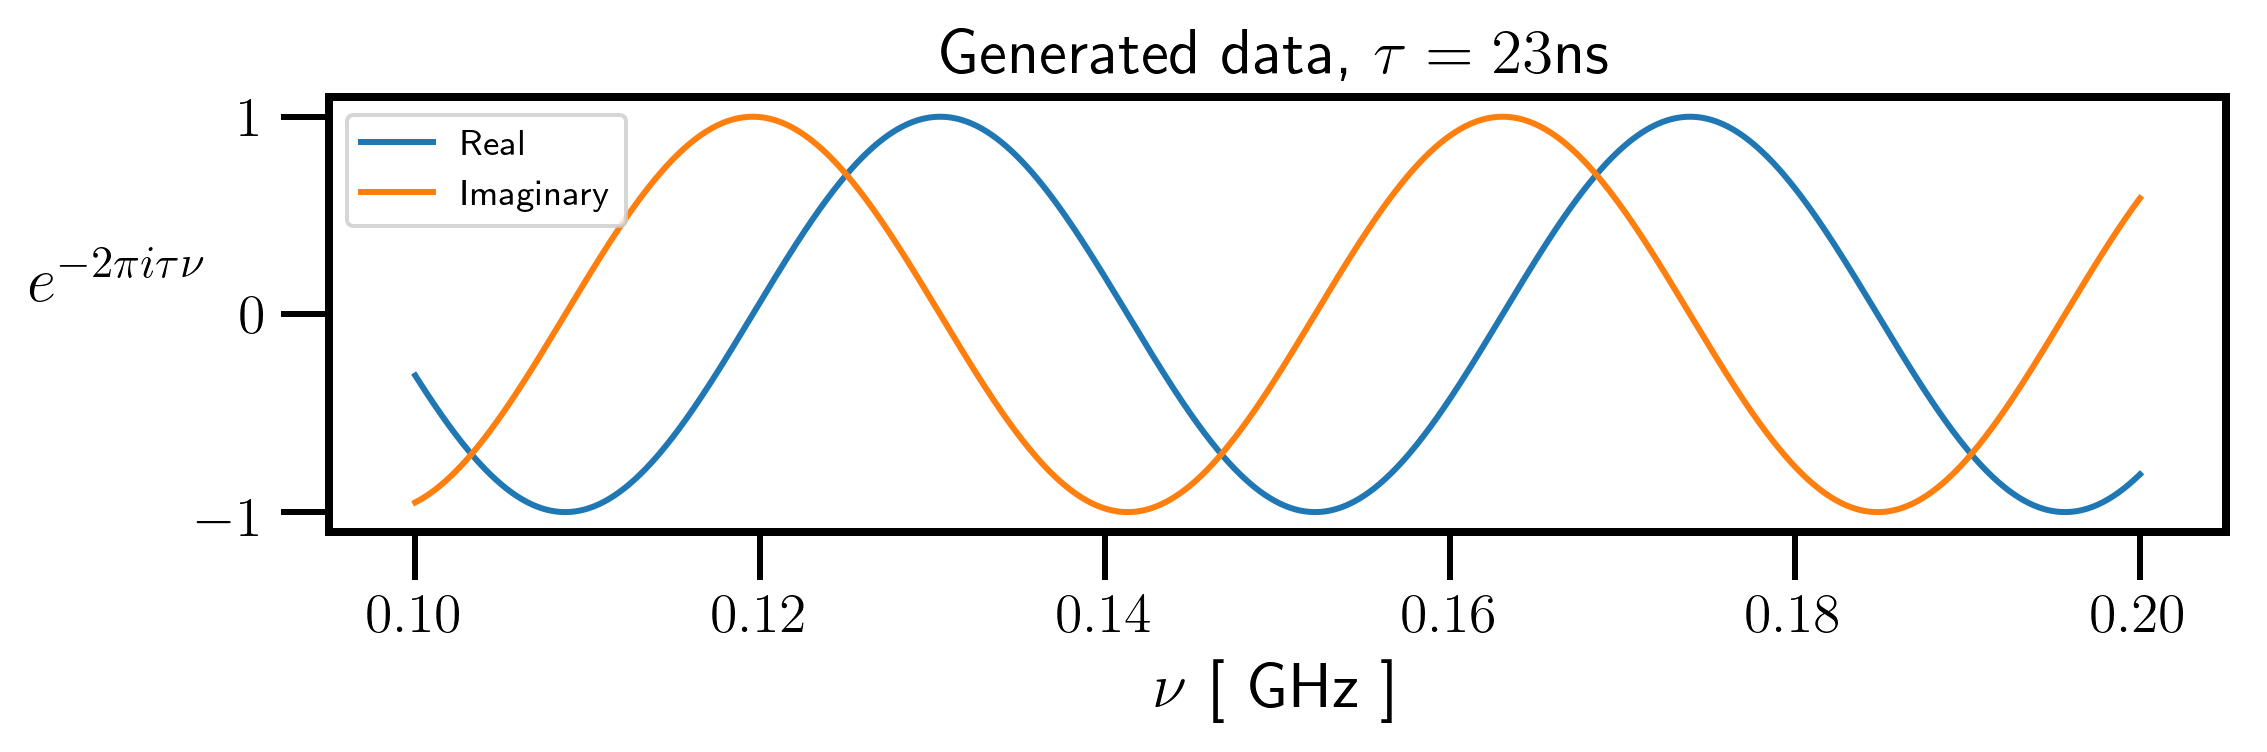

In [10]:
# plot of generated data
fig, ax = plt.subplots(figsize = (8.5, 2), dpi = 144)
ax.plot(freqs, np.real(data), label = 'Real')
ax.plot(freqs, np.imag(data), label = 'Imaginary')

ax.legend(fontsize = 9)
ax.set_title(r'Generated data, $\tau = 23$ns')
ax.set_ylabel(r'$e^{-2\pi i \tau \nu}$', rotation = 0, labelpad=20)
ax.set_xlabel(r'$\nu$ [ GHz ]')
plt.show()

noise applied to np.angle(data)

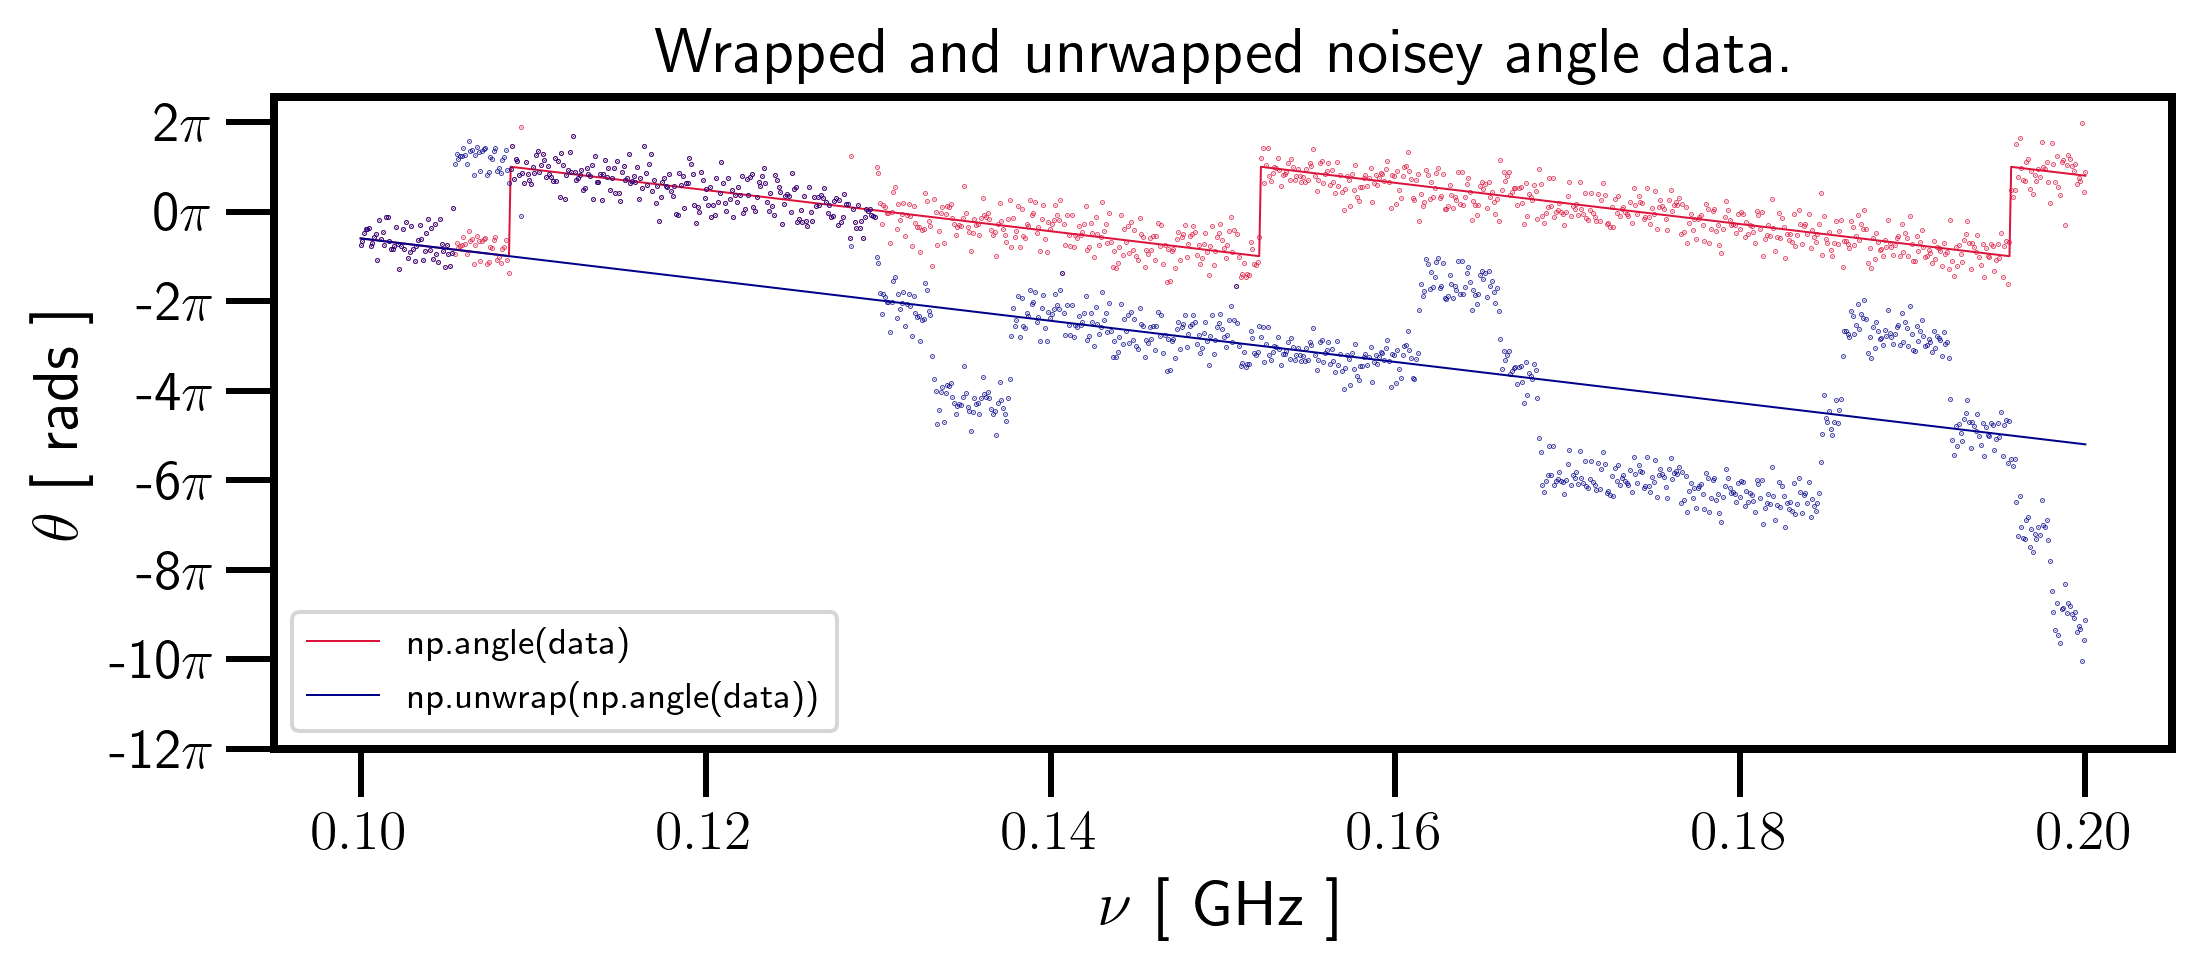

In [12]:
# plot of 'perfect' and noisy data wrapped and unwrapped

fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 144)

ax.plot(freqs, np.angle(data),
        linewidth = 0.5,
        color = 'crimson', label = 'np.angle(data)')

ax.plot(freqs, noisey_data,
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'crimson')


ax.plot(freqs, np.unwrap(np.angle(data)), 
        linewidth = 0.5,
        color = 'darkblue', label = 'np.unwrap(np.angle(data))')

ax.plot(freqs, np.unwrap(noisey_data), 
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'darkblue')

ax.set_ylabel(r'$\theta$ [ rads ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')


ax.set_title('Wrapped and unrwapped noisey angle data.')


ax.legend(loc = 'lower left', fontsize = 9)

ax.set_yticks(np.arange(-12 * np.pi, 4 * np.pi, np.pi)[::2])
ax.set_yticklabels([r"{}$\pi$".format(int(round(value / np.pi))) for value in ax.get_yticks()])

plt.show()




> Is this too noisy?

In [30]:
slope = np.diff(np.unwrap(np.angle(data)))
print('Slope of perfect data:\n mean = {:2.4f}\n std  = {:2.4f}'.format(np.mean(slope), np.std(slope)))

Slope of perfect data:
 mean = -0.0141
 std  = 0.0000


In [32]:
slope = np.diff(np.unwrap(noisey_data))
print('Slope of noisey data:\n mean = {:2.4f}\n std  = {:2.4f}'.format(np.mean(slope), np.std(slope)))

Slope of noisey data:
 mean = -0.0258
 std  = 1.3670


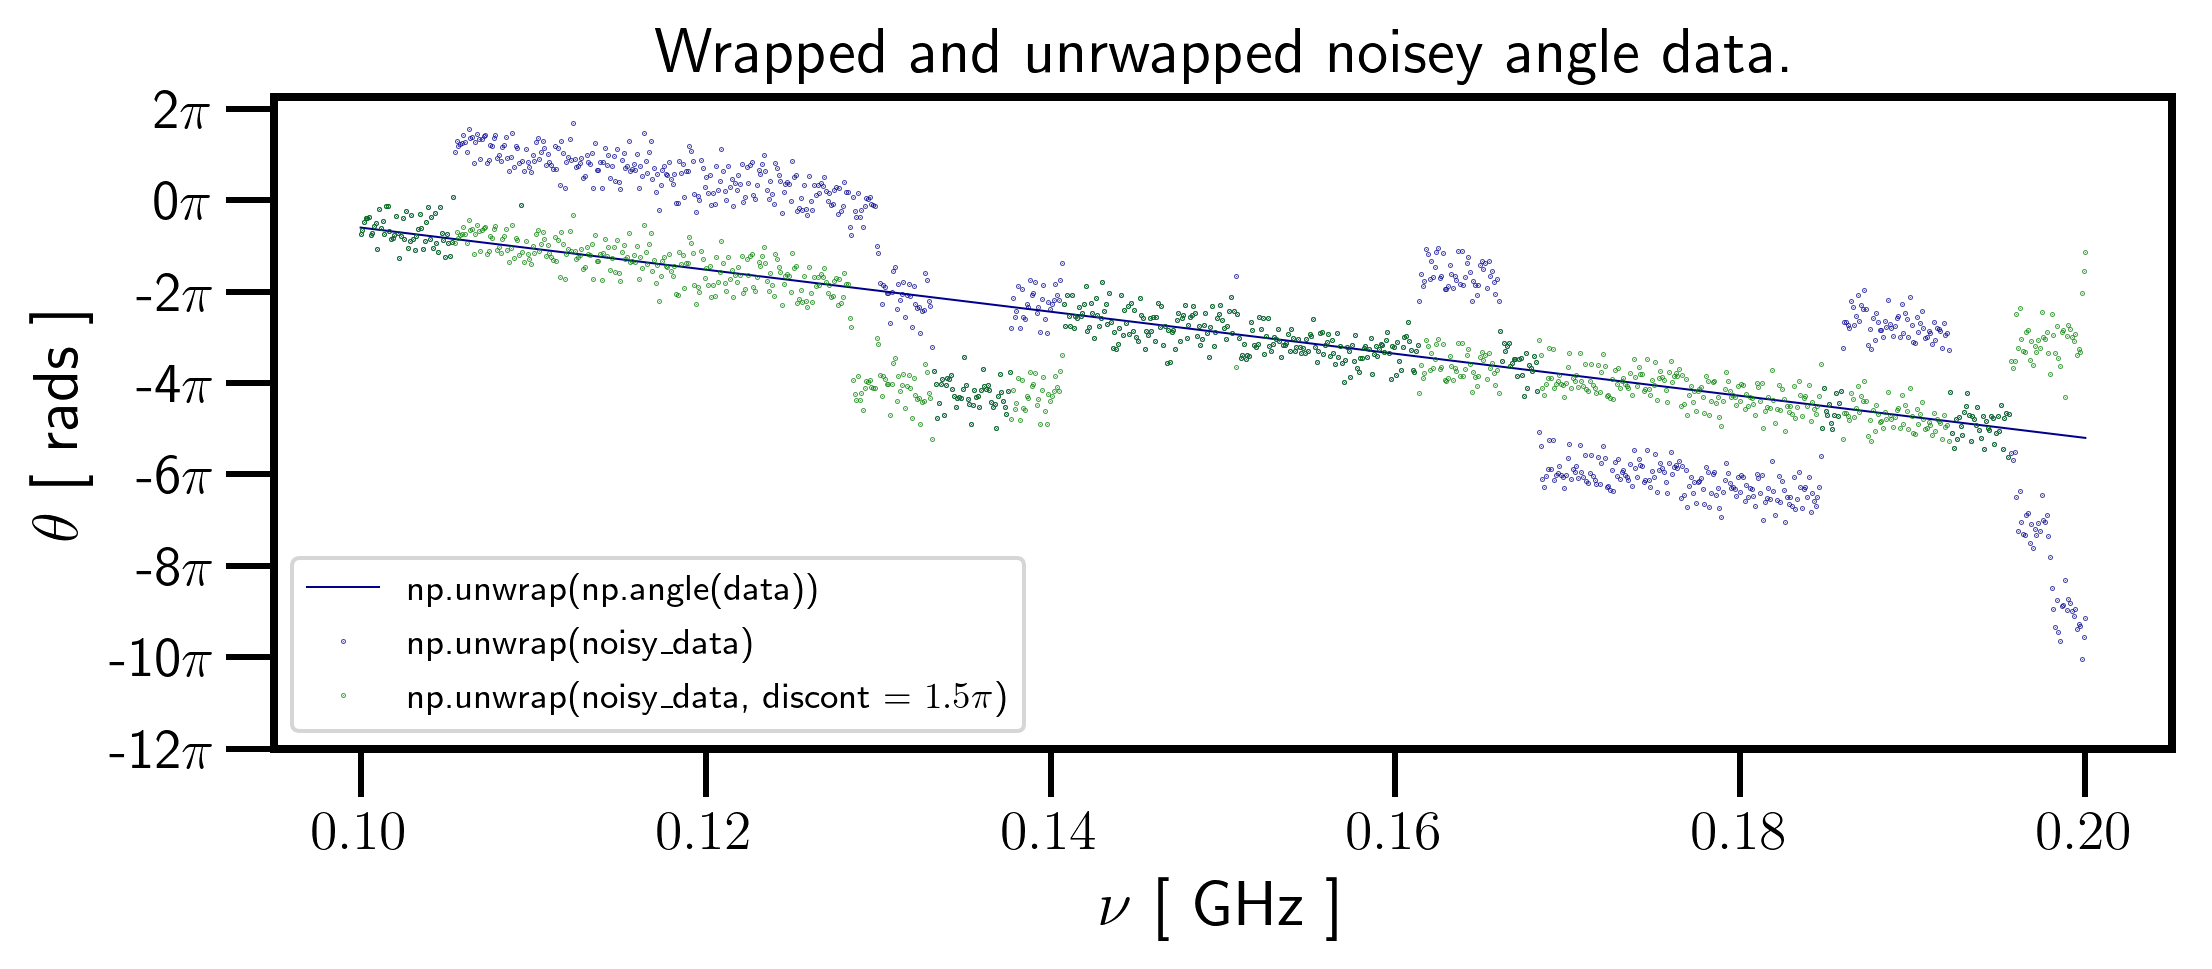

In [50]:
# plot of 'perfect' and noisy data wrapped and unwrapped

fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 144)

ax.plot(freqs, np.unwrap(np.angle(data)), 
        linewidth = 0.5,
        color = 'darkblue', label = 'np.unwrap(np.angle(data))')

ax.plot(freqs, np.unwrap(noisey_data), 
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'darkblue', label = 'np.unwrap(noisy\_data)')

ax.plot(freqs, np.unwrap(noisey_data, discont = 1.5 * np.pi), 
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'green', label = r'np.unwrap(noisy\_data, discont = $1.5\pi$)')

ax.set_ylabel(r'$\theta$ [ rads ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')


ax.set_title('Wrapped and unrwapped noisey angle data.')


ax.legend(loc = 'lower left', fontsize = 9)

ax.set_yticks(np.arange(-12 * np.pi, 4 * np.pi, np.pi)[::2])
ax.set_yticklabels([r"{}$\pi$".format(int(round(value / np.pi))) for value in ax.get_yticks()])

plt.show()





> comparing different values of discont.

 - I think i need to write my own unwrap function..

In [79]:
slope = np.diff(np.unwrap(noisey_data, discont = 1.5 * np.pi))
print('Slope of noisey data with discont = 1.5:\n mean = {:2.4f}\n std  = {:2.4f}'.format(np.mean(slope), np.std(slope)))

Slope of noisey data with discont = 1.5:
 mean = -0.0089
 std  = 1.4087


If we are going to be doing machine learning on this we will need some training data.

In [62]:
num_taus = 1000

# random taus
rand_taus = 30 * np.random.uniform(low = -1, high = 1, size = num_taus)

rand_angle_data = np.empty((num_taus, len(freqs)))
for i, tau in enumerate(rand_taus):
    rand_angle_data[i] = np.angle(np.exp(-2 * np.pi * 1j * tau * freqs))

In [77]:
def slope(angle_data, perfect = True):
    if perfect == True:
        return np.mean(np.diff(angle_data))

In [78]:
perfect_slopes = [slope(angle_data) for angle_data in rand_angle_data]

Need to research how to use training data in TensorFlow.

 - How much training data do I need
 - what format should the data be
 - how do I incorporate the noisy data
   -  how do i get good slopes for noisy data...